# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [84]:
housing_prices_boston = pd.read_csv(r'D:\IronHack\labs\AI\lab-problems-in-ml\data\boston_data.csv')

In [85]:
housing_prices_boston.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
380,88.97620,0.0,18.10,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
10,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64,10.4
354,1.15172,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,4.0,307.0,21.0,358.77,18.35,13.1
206,6.39312,0.0,18.10,0.0,0.584,6.162,97.4,2.2060,24.0,666.0,20.2,302.76,24.10,13.3
55,5.73116,0.0,18.10,0.0,0.532,7.061,77.0,3.4106,24.0,666.0,20.2,395.28,7.01,25.0


In [86]:
housing_prices_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


All features are stored in a proper data type, and there are no null values in the data set.

In [87]:
fig = make_subplots(rows = len(housing_prices_boston.columns), cols=1)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkblue','red', 'blue', 'green', 'purple', 'orange', 'darkblue','red','blue']

for i, col in enumerate(housing_prices_boston.columns):
    fig.add_trace(go.Box(x=housing_prices_boston[col], name = col, marker=dict(color=colors[i])), row=i+1, col=1)

fig.update_layout(height=200 * housing_prices_boston.shape[1], width=1000, title_text="Numerical variables distributions")
fig.show()

Let's drop the outliers

In [88]:
QI = housing_prices_boston['crim'].quantile(.75) - housing_prices_boston['crim'].quantile(.25)
outliers_upper_filter = housing_prices_boston['crim'].quantile(.75) + 1.5 * QI
outliers_lower_filter = housing_prices_boston['crim'].quantile(.25) - 1.5 * QI
housing_prices_boston = housing_prices_boston[(outliers_lower_filter < housing_prices_boston['crim']) & (housing_prices_boston['crim']<outliers_upper_filter)]


In [89]:
QI = housing_prices_boston['zn'].quantile(.75) - housing_prices_boston['zn'].quantile(.25)
outliers_upper_filter = housing_prices_boston['zn'].quantile(.75) + 1.5 * QI
outliers_lower_filter = housing_prices_boston['zn'].quantile(.25) - 1.5 * QI
housing_prices_boston = housing_prices_boston[(outliers_lower_filter < housing_prices_boston['zn']) & (housing_prices_boston['zn']<outliers_upper_filter)]


In [90]:
QI = housing_prices_boston['black'].quantile(.75) - housing_prices_boston['black'].quantile(.25)
outliers_upper_filter = housing_prices_boston['black'].quantile(.75) + 1.5 * QI
outliers_lower_filter = housing_prices_boston['black'].quantile(.25) - 1.5 * QI
housing_prices_boston = housing_prices_boston[(outliers_lower_filter < housing_prices_boston['black']) & (housing_prices_boston['black']<outliers_upper_filter)]


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

I pick NOX,RM,AGE,RAD,PTRATIO,LSTAT.

In [91]:
from sklearn.linear_model import LinearRegression
variables = ['nox','rm', 'age', 'rad', 'ptratio', 'lstat'] 
fig = make_subplots( rows = len(variables), cols=1)

for i, var in enumerate(variables):
    model = LinearRegression()
    X = housing_prices_boston[var].values.reshape(len(housing_prices_boston[var]),1)
    Y =  housing_prices_boston['medv'].values.reshape(len(housing_prices_boston['medv']),1)
    model = model.fit(X,Y)
    reg_line = model.intercept_[0] + model.coef_[0] * housing_prices_boston[var]
    fig.add_trace(go.Scatter(x=housing_prices_boston[var], y = housing_prices_boston['medv'],mode='markers', name=var),row=i+1, col=1)
    fig.add_trace(go.Scatter(x=housing_prices_boston[var], y = reg_line,name='reg line'),row=i+1,col=1)
   

fig.update_layout(height=200 * housing_prices_boston.shape[1], width=1000, title_text="Regression lines")
fig.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

rad and ptration do not show a strong linear relation with the prices. 

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<Axes: >

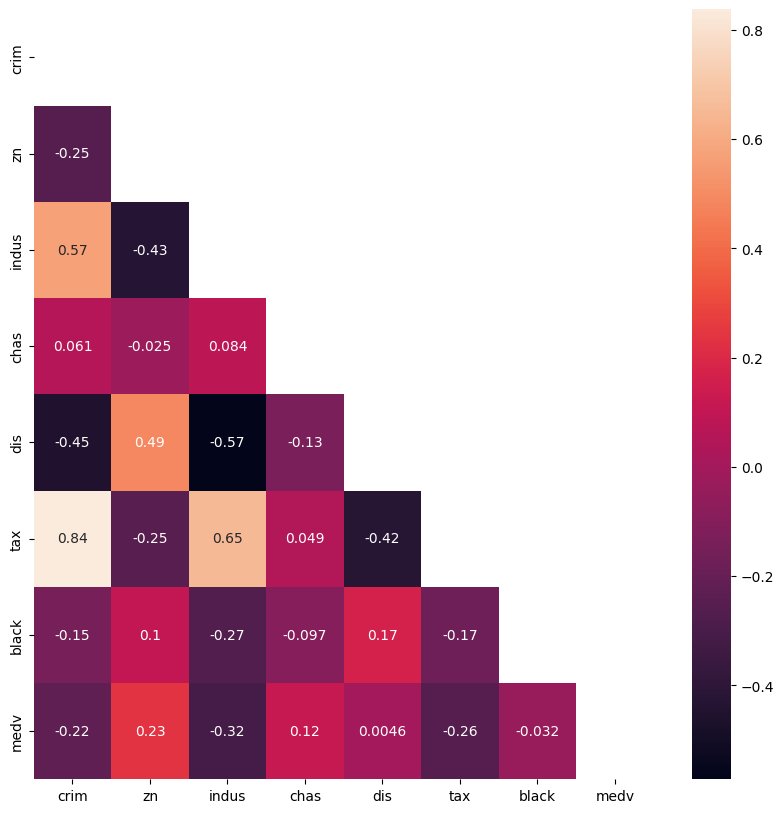

In [123]:
housing_prices_boston_corr = housing_prices_boston[[col for col in housing_prices_boston.columns if col not in variables]].corr(method='pearson')
#housing_prices_boston_corr = housing_prices_boston.corr(method='spearman')
mask = np.zeros_like(housing_prices_boston_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(housing_prices_boston_corr, mask=mask, annot=True)


No these features do not show a solid linear realation with the target variable and it seems that the first set of variables are the most corrlated ones actually, there are some variables among that can be ignored due to low correlation score like 'rad'.   

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [124]:
housing_prices_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,1.307242,6.201049,10.184860,0.080420,0.539202,6.359325,66.835315,3.897625,7.713287,364.744755,18.366084,388.936888,11.175804,24.009441
std,2.426277,11.683275,6.333907,0.272418,0.103851,0.647012,26.653570,1.797992,7.297317,148.661707,2.025834,10.383837,5.648448,8.075822
min,0.006320,0.000000,1.250000,0.000000,0.409000,3.561000,2.900000,1.169100,1.000000,188.000000,13.000000,350.450000,1.730000,8.500000
25%,0.083235,0.000000,5.190000,0.000000,0.453000,5.960250,47.200000,2.424725,4.000000,276.000000,17.400000,385.992500,6.877500,19.425000
50%,0.180290,0.000000,8.140000,0.000000,0.515000,6.252500,70.400000,3.539200,5.000000,307.000000,18.600000,392.995000,10.040000,22.200000
75%,0.767308,0.000000,18.100000,0.000000,0.582500,6.630750,91.075000,5.100400,7.000000,403.000000,20.200000,396.780000,14.250000,26.575000
max,9.966540,45.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [125]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    return r2_score(y_true, y_predict)


### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [127]:
from sklearn.model_selection import train_test_split
features = housing_prices_boston.drop(['medv'], axis=1)
target = housing_prices_boston['medv']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=41)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [135]:
from sklearn.ensemble import RandomForestRegressor
train_score = []
test_score = []
depths = [2,4,6,8,10]
for depth in depths:
    model = RandomForestRegressor(max_depth = depth) 
    model = model.fit(X_train, y_train)
    y_predict_train = model.predict(X_train)
    y_predict_test = model.predict(X_test)
    train_score.append(r2_score(y_train, y_predict_train))
    test_score.append(r2_score(y_test, y_predict_test))




In [136]:
print(f'train scores are: {train_score}')
print(f'test scores are: {test_score}')

train scores are: [0.7303859247453075, 0.8969284445719884, 0.945585421624725, 0.9628077419256331, 0.965973751102339]
test scores are: [0.6843472318509187, 0.7644324421656282, 0.814670632260541, 0.8252867612174997, 0.8235395534127633]


Now, plot the score for each tree on the training set and on the testing set.

C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz

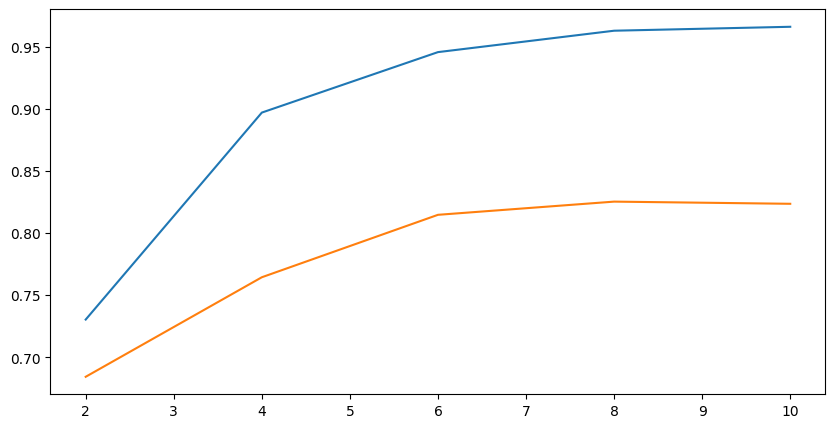

In [143]:
fig = plt.figure(figsize=(10,5))
fig1 = sns.lineplot(x = depths, y=train_score)
fig2 = sns.lineplot(x = depths, y=test_score )


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [98]:
# Your response here

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [99]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [100]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [101]:
# Your response here